<a href="https://colab.research.google.com/github/ManasviEmmadi/CDC/blob/main/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = df = pd.read_csv("/content/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

#### Credit card Dataset collected has a "Time" column indicating the time of transaction, other independant variables, "Amount" column showing amount of transaction and the target column named "CLASS" indicating the fraud status.

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
(df.isnull().sum()/len(df)) * 100 ##percentage of null values


Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

Few columns are having  1 null value (0.000721%) with other columns being filled completely

In [ ]:
df.dropna()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


Text(0.5, 1.0, 'Fraud status Distributions')

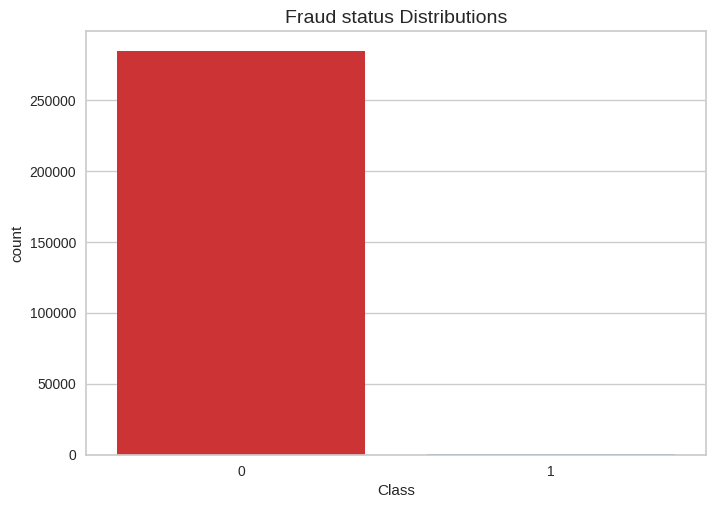

In [ ]:
sns.countplot(x = 'Class', data=df, palette='Set1')
plt.title('Fraud status Distributions', fontsize=14)

###This graph clearly depicts that the data is highly imbalnced.
###Zero indicates no fraud and 1 implies that there is a occurence of fraud

(0.0, 172792.0)

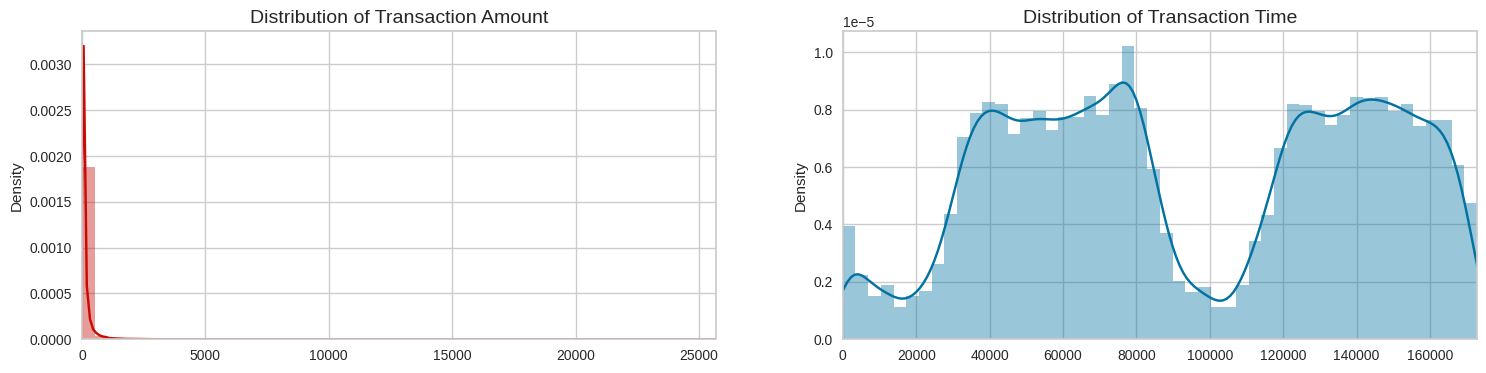

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

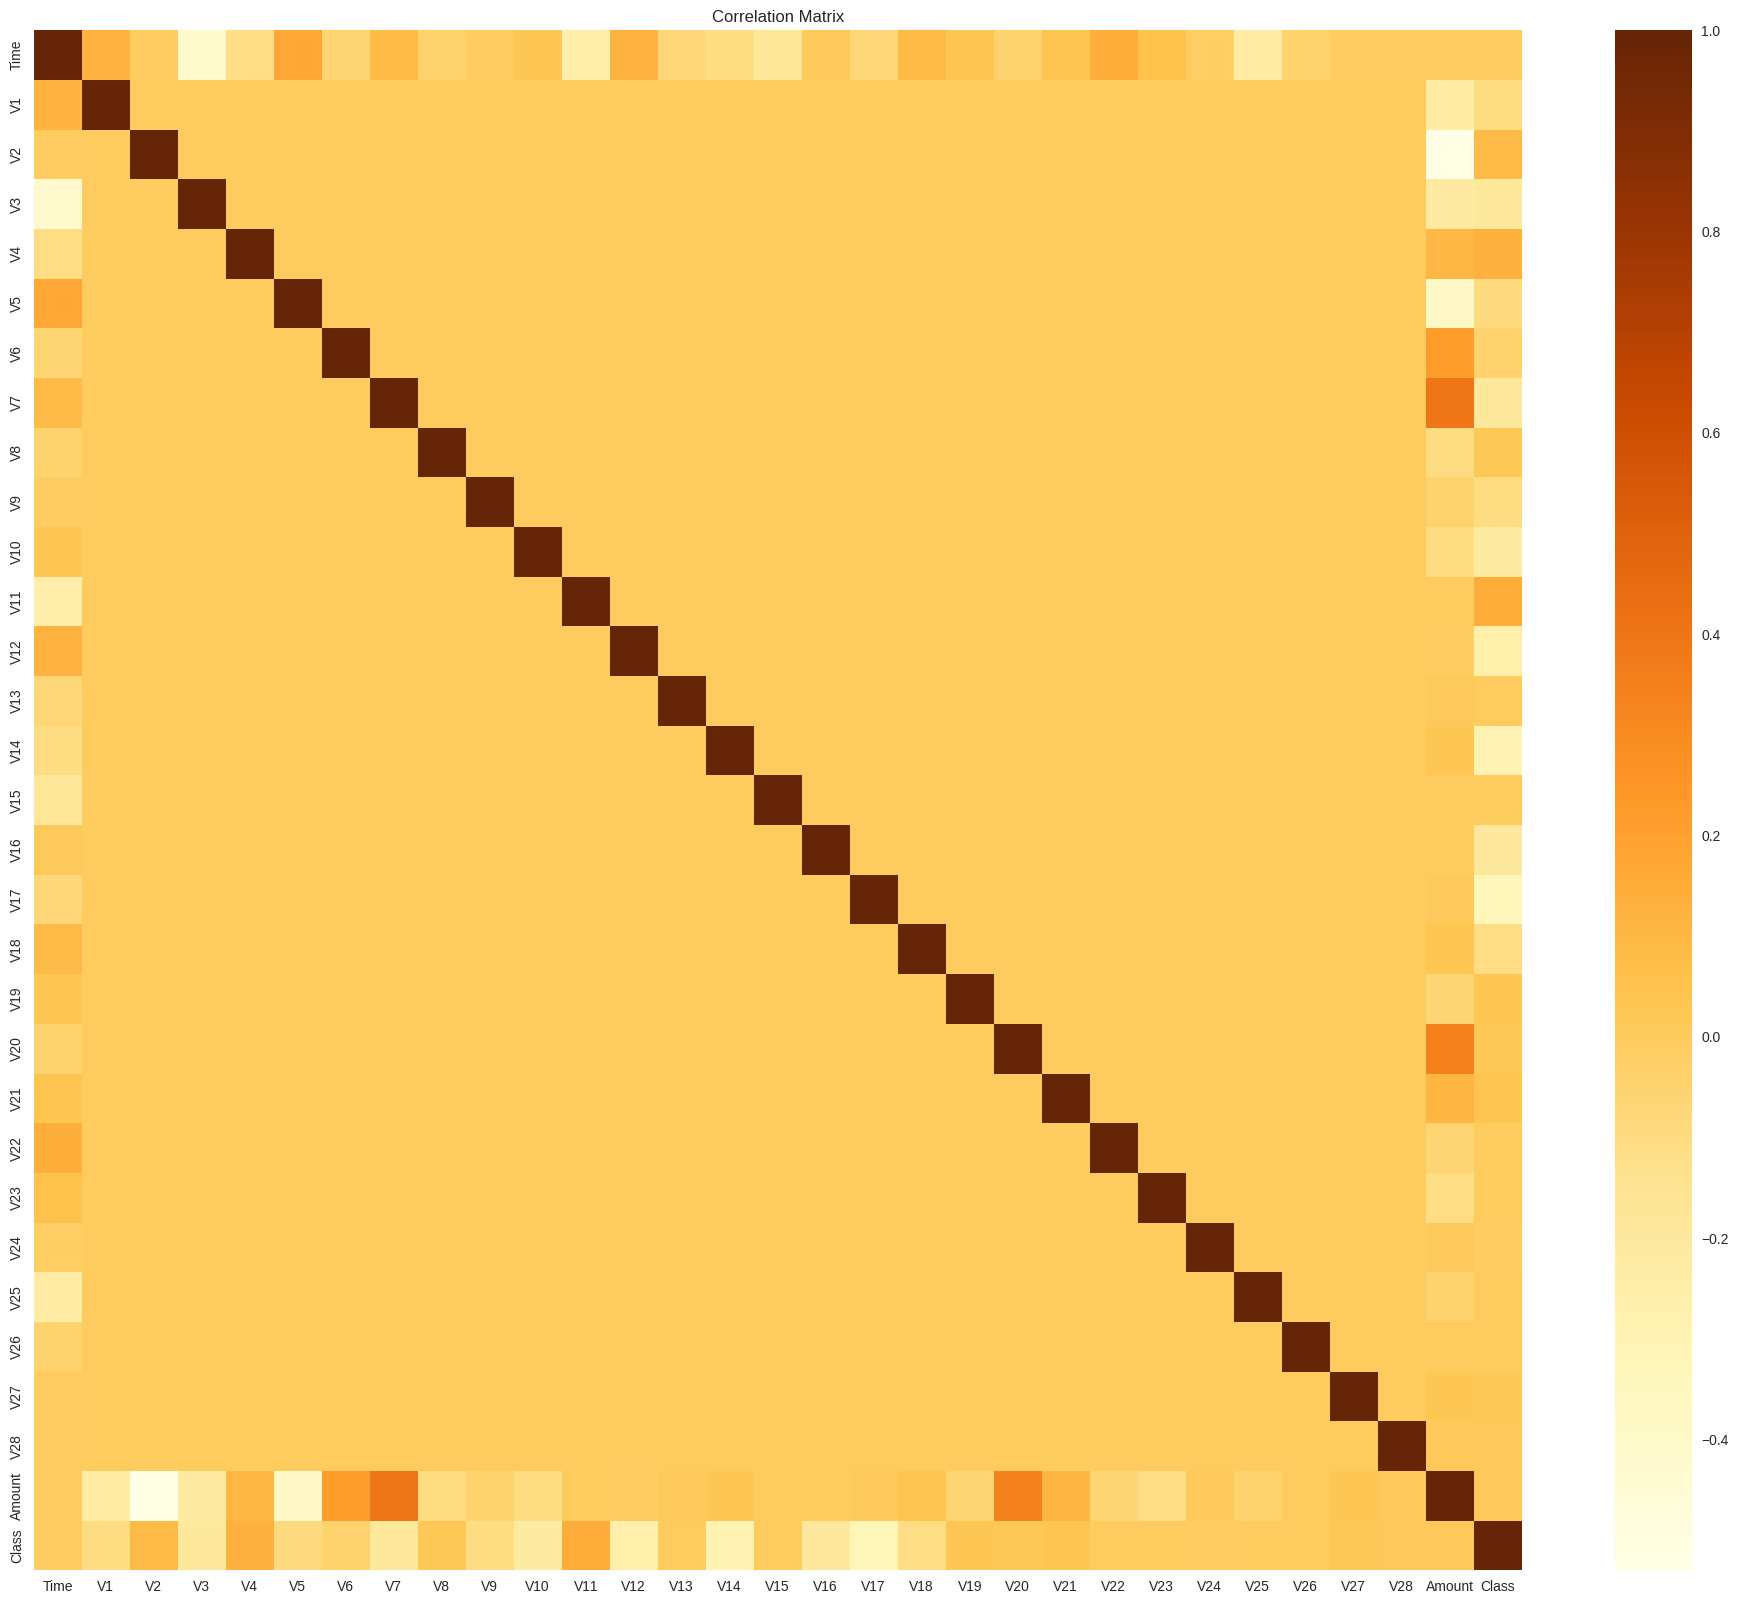

In [ ]:
correlation = df.corr().round(2)
plt.figure(figsize = (24,20))
plt.title("Correlation Matrix")
sns.heatmap(correlation, cmap = 'YlOrBr')
plt.show()


####We will perform scaling on the columns containing Time and Amount. The scaling process will ensure that Time and Amount are transformed similarly to the other columns. Additionally, we will create a sub-sample of the dataframe that includes an equal number of Fraud and Non-Fraud cases. This sub-sample will help our algorithms gain a better understanding of the patterns that distinguish fraudulent transactions from legitimate ones.

In [ ]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [ ]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [ ]:
(df['Class']==1).sum()

492

In [ ]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.
#Data is shuffled before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 492 rows, hence making number of non fraud classes also to 492
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
bal_df = normal_distributed_df.sample(frac=1, random_state=42)

bal_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
201824,0.100839,0.821467,0.488632,-0.298174,0.823369,-0.565609,1.223049,-0.838197,0.691110,0.030131,...,0.589589,0.038767,1.023609,-1.521572,0.137232,-0.647464,-0.377715,0,-0.167680,0.579882
149522,-3.951209,2.881805,-6.421490,2.434181,-1.327325,-2.122106,-3.227533,-0.685560,0.775985,-4.723092,...,0.279403,0.570821,0.656271,-0.298601,-0.407571,-1.378703,1.379130,1,0.428841,0.078890
211689,2.030176,-0.879172,-0.108452,-1.524687,-1.116126,-0.294112,-1.129170,0.051656,2.518864,-1.027318,...,1.011609,0.185233,0.736336,-0.265537,-0.211780,0.072069,-0.020776,0,-0.188779,0.632362
213092,-4.666500,-3.952320,0.206094,5.153525,5.229469,0.939040,-0.635033,-0.704506,-0.234786,4.031435,...,1.821422,0.113563,-0.759673,-0.502304,0.630639,-0.513880,0.729526,1,0.006567,0.639281
42696,-8.426814,6.241659,-9.946470,8.199614,-8.213093,-2.522046,-11.643028,5.339500,-7.051016,-12.265324,...,0.692667,0.020305,0.499809,0.467594,0.483162,1.195671,0.198294,1,0.925452,-0.510920


Distribution of the Classes in new the balanced dataset
0    0.5
1    0.5
Name: Class, dtype: float64


Text(0.5, 1.0, 'New Fraud status Distributions')

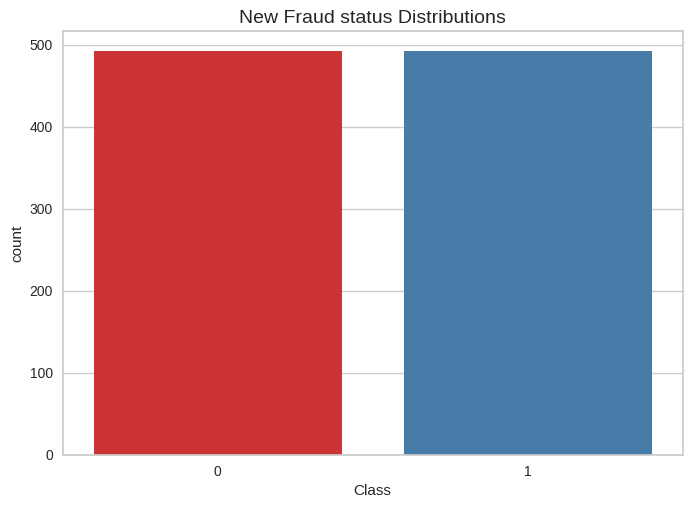

In [ ]:
print('Distribution of the Classes in new the balanced dataset')
print(bal_df['Class'].value_counts()/len(bal_df))

sns.countplot(x = 'Class', data=bal_df, palette='Set1')
plt.title('New Fraud status Distributions', fontsize=14)


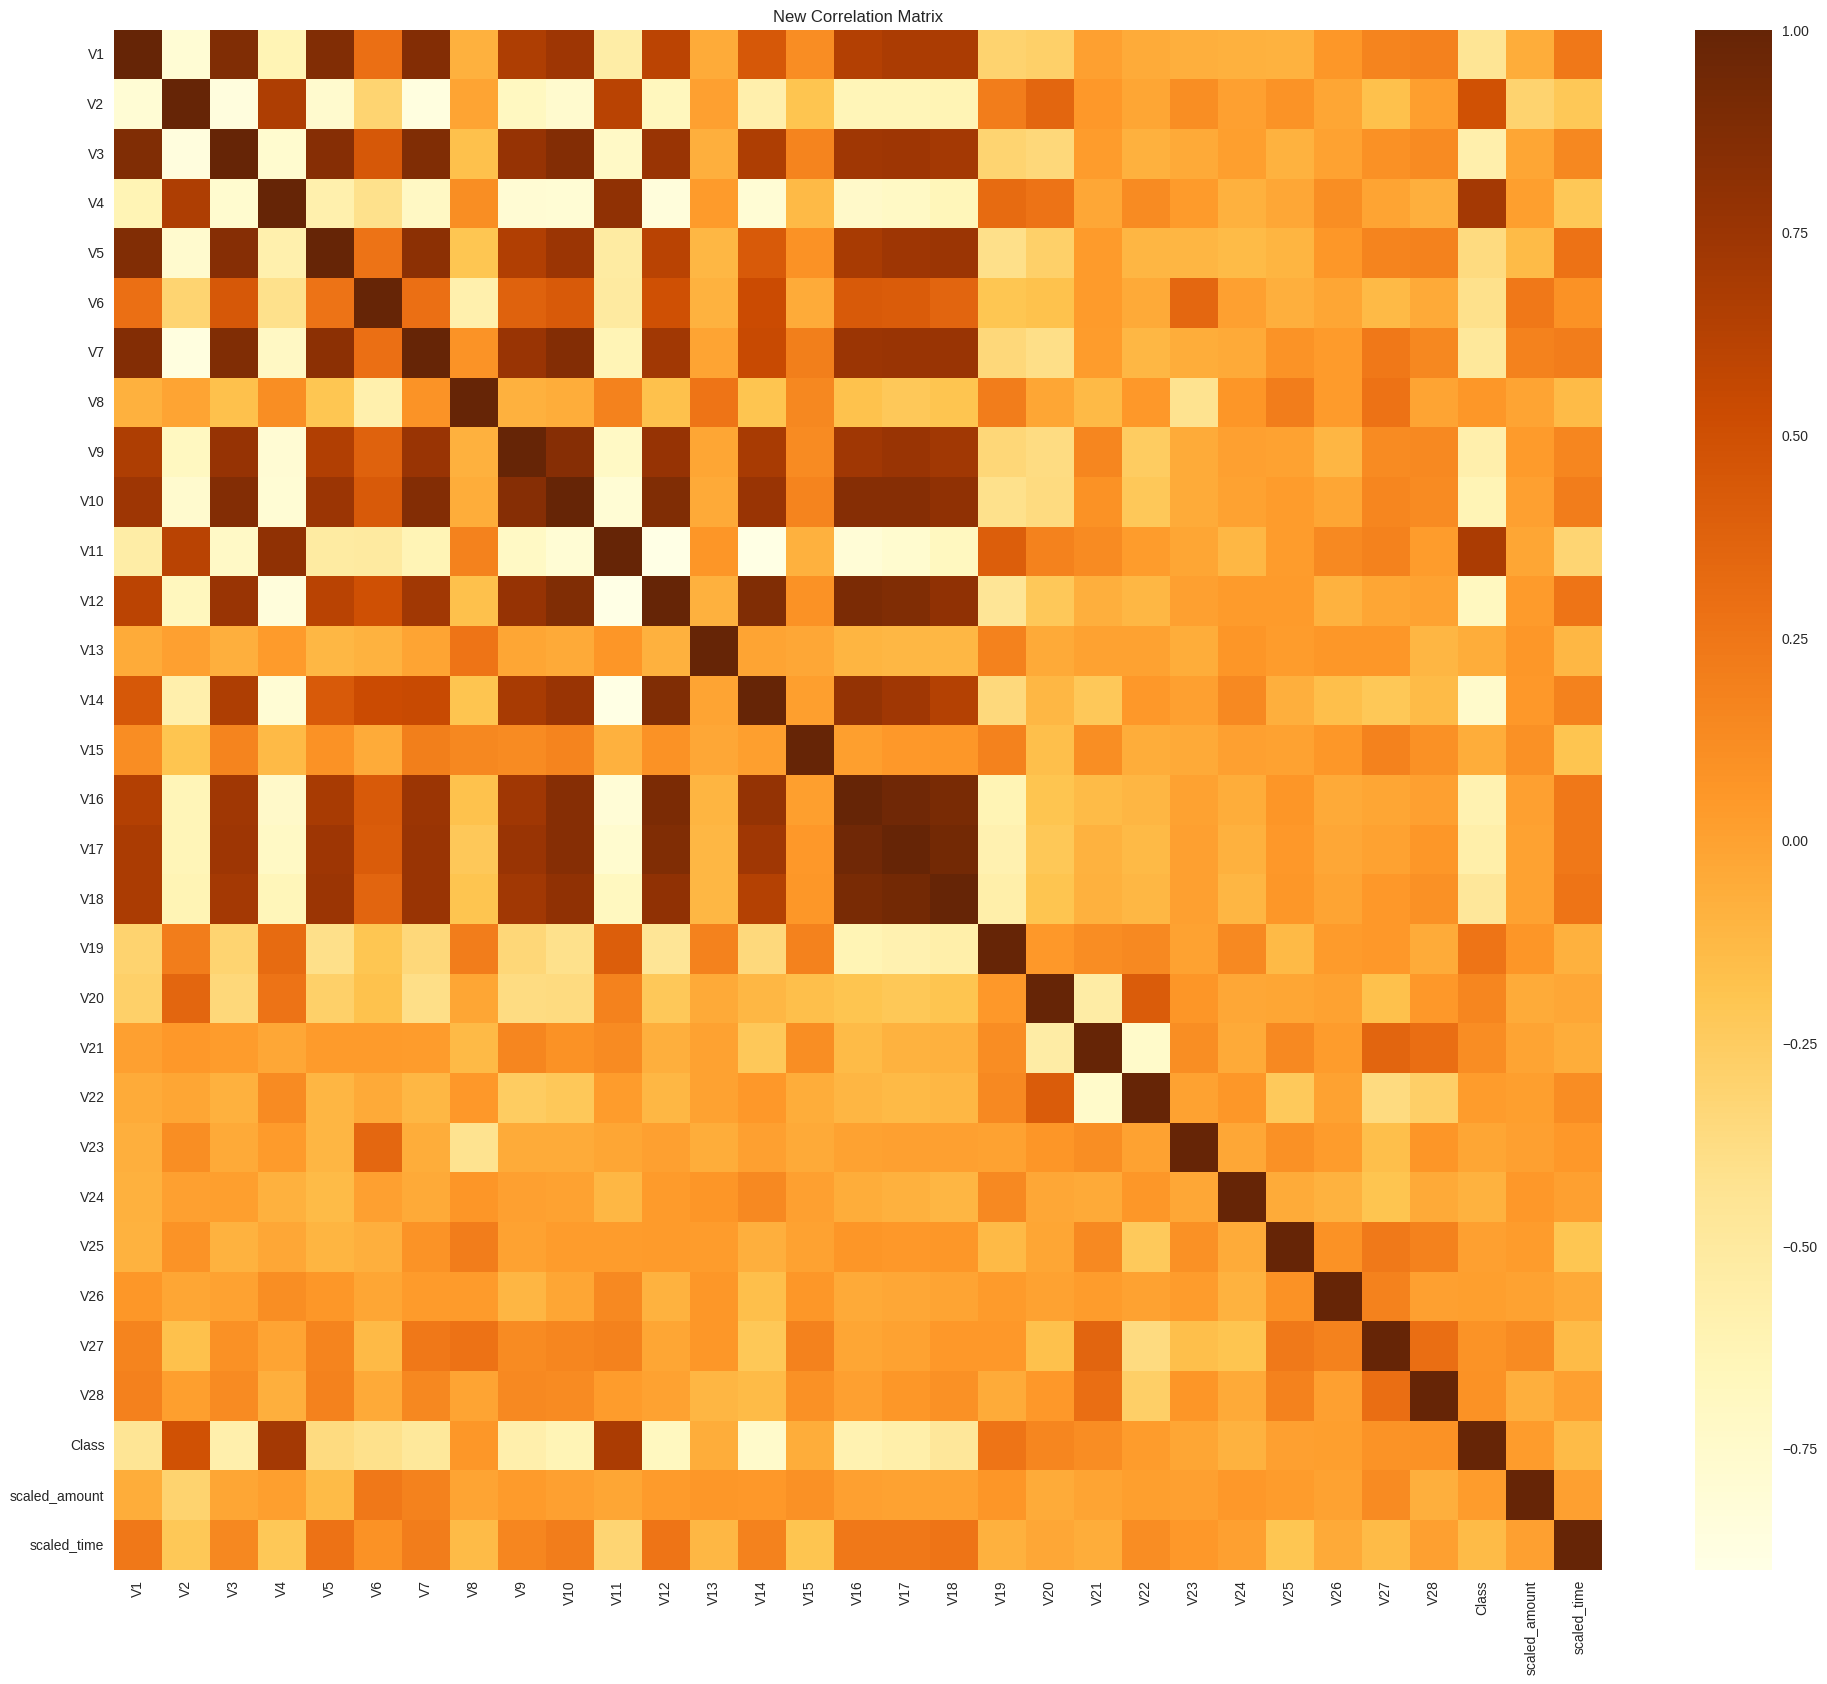

In [ ]:
correlation = bal_df.corr().round(2)
plt.figure(figsize = (24,20))
plt.title("New Correlation Matrix after undersampling ")
sns.heatmap(correlation, cmap = 'YlOrBr')
plt.show()

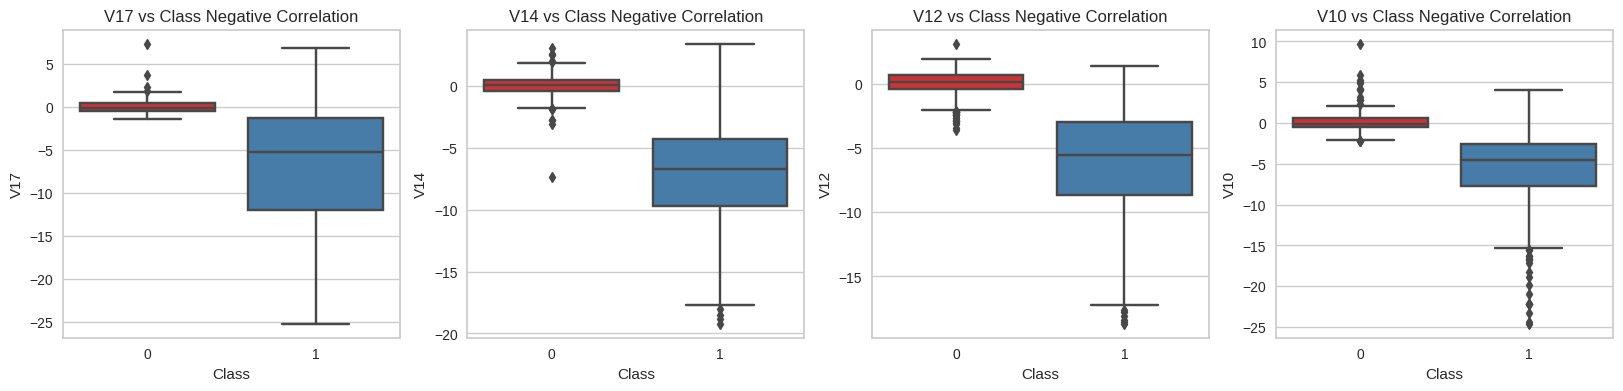

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=bal_df, palette='Set1', ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=bal_df, palette='Set1', ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=bal_df, palette='Set1', ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=bal_df, palette='Set1', ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')


plt.show()

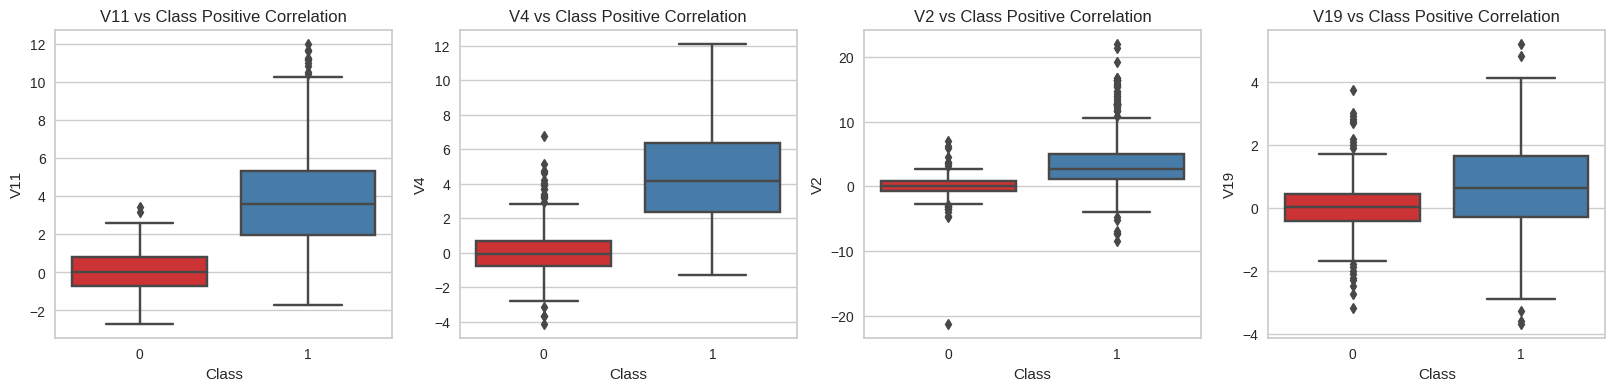

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=bal_df, palette='Set1', ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=bal_df, palette='Set1', ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=bal_df, palette='Set1', ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=bal_df, palette='Set1', ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

###Anamoly detection and Outlier removal

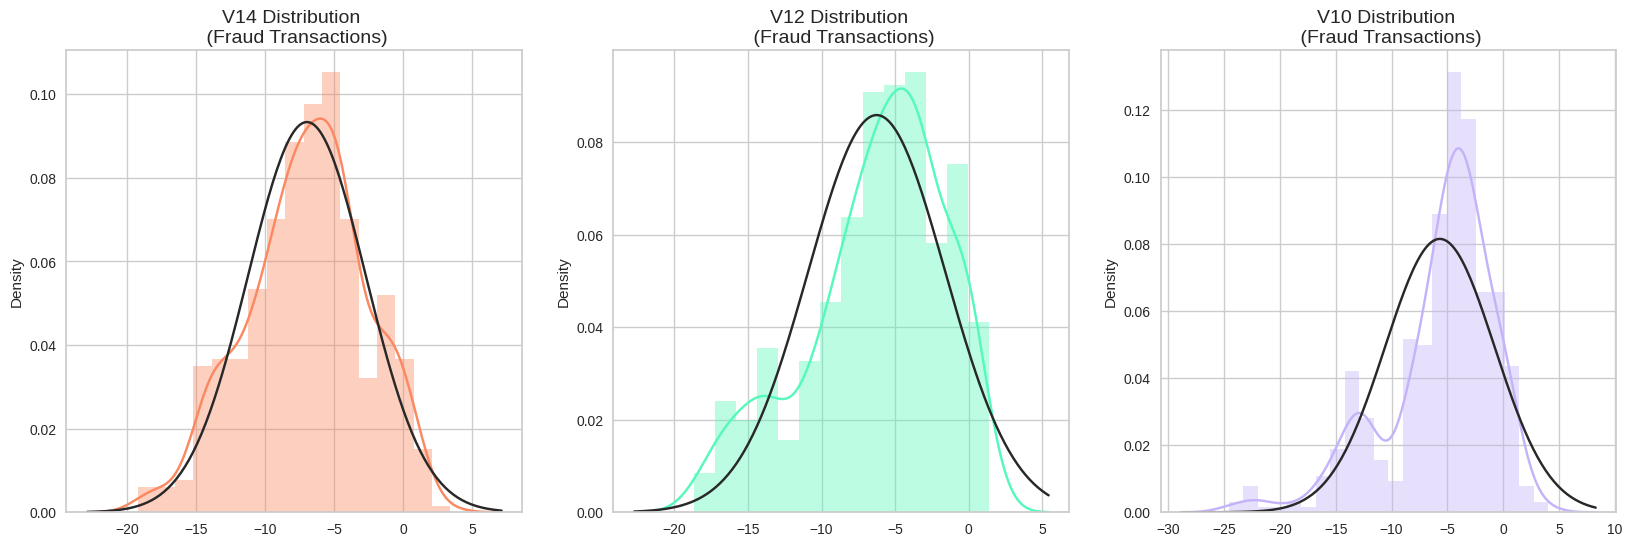

In [ ]:
##We first start by visualizing the distribution of the feature we are going to use to eliminate some of the outliers.
#V14 is the only feature that has a Gaussian distribution compared to features V12 and V10.
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = bal_df['V14'].loc[bal_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = bal_df['V12'].loc[bal_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = bal_df['V10'].loc[bal_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

In [ ]:
##After we decide which number we will use to multiply with the interquartile range (the lower more outliers removed),
##we will proceed in determining the upper and lower thresholds by substrating q25 - threshold (lower extreme threshold) and adding q75 + threshold (upper extreme threshold).
##Lastly, we create a conditional dropping stating that if the "threshold" is exceeded in both extremes, the instances will be removed.

##V14 outlier removal

v14_fraud = bal_df['V14'].loc[bal_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V14 outliers:{}'.format(outliers))

new_df = bal_df.drop(bal_df[(bal_df['V14'] > v14_upper) | (bal_df['V14'] < v14_lower)].index)




Quartile 25: -9.692722964972386 | Quartile 75: -4.282820849486865
iqr: 5.409902115485521
Cut Off: 8.114853173228282
V14 Lower: -17.807576138200666
V14 Upper: 3.8320323237414167
Feature V14 Outliers for Fraud Cases: 4
V14 outliers:[-18.0499976898594, -19.2143254902614, -18.4937733551053, -18.8220867423816]


In [ ]:
## V12 outlier removal
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [-18.4311310279993, -18.0475965708216, -18.5536970096458, -18.6837146333443]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 976


In [ ]:
##V10 outlier removal
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

V10 Lower: -14.89885463232024
V10 Upper: 4.92033495834214
V10 outliers: [-15.5637913387301, -16.2556117491401, -16.6011969664137, -22.1870885620007, -18.2711681738888, -20.9491915543611, -19.836148851696, -15.2318333653018, -17.1415136412892, -22.1870885620007, -16.7460441053944, -24.5882624372475, -16.6496281595399, -14.9246547735487, -18.9132433348732, -15.2399619587112, -23.2282548357516, -15.2399619587112, -24.4031849699728, -15.1241628144947, -14.9246547735487, -15.5637913387301, -15.3460988468775, -16.3035376590131, -15.1237521803455, -22.1870885620007, -22.1870885620007]
Feature V10 Outliers for Fraud Cases: 27
Number of Instances after outliers removal: 945


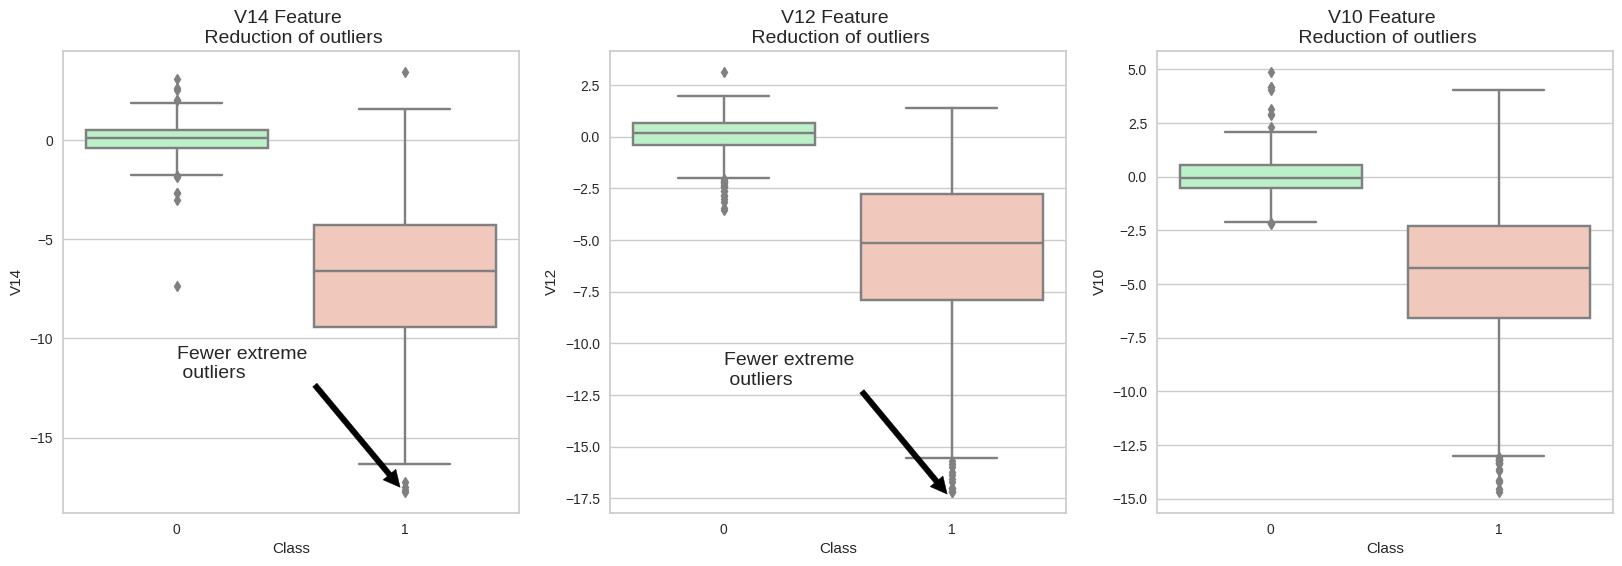

In [ ]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)
# Feature V10
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)


plt.show()

###Model Application

In [ ]:
#Undersampling before cross validating (prone to overfit)
X = bal_df.drop('Class', axis=1)
y = bal_df['Class']

In [ ]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [ ]:
# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier" : RandomForestClassifier()
}

In [ ]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 94.0 % accuracy score
Classifiers:  SVC Has a training score of 94.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 91.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 95.0 % accuracy score


####XGBOOST AND OPTUNA

In [ ]:
V_feat = [x for x in df.columns if "V" in x]
df["all_sum"] = df[V_feat].gt(0).sum(axis = 1) - df[V_feat].lt(0).sum(axis = 1)
df["v_sum"] = df[V_feat].sum(axis=1)

In [ ]:
X = df.drop(["Time","Class","id"], axis=1, errors="ignore")
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=2023)

In [ ]:

scaleFeatures = X.columns.to_list()
rs = RobustScaler()
X[scaleFeatures] = rs.fit_transform(X[scaleFeatures])
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time,all_sum,v_sum
204663,0.708993,-0.892308,-0.523602,-0.279581,-0.215101,0.763463,-0.437525,0.473279,1.243115,-0.490130,...,1.461633,-1.352208,-1.472609,0.932143,-0.251421,-0.375161,1.957801,0.595554,-1.00,-0.853346
175605,0.764120,-0.431964,-1.260224,-0.059418,1.035819,1.218996,0.206701,0.314773,0.311765,-0.055839,...,-0.209279,-1.208468,0.281523,-0.703235,0.056809,-0.523546,1.486201,0.443133,0.25,0.445553
169525,0.872397,-0.050147,-0.936448,0.454510,0.072638,-0.541645,-0.099359,-0.183633,0.590064,-0.399545,...,0.197142,-0.142733,-0.015935,1.186197,-0.297807,-0.400520,-0.209739,0.411800,0.25,0.106980
133693,-0.860638,-0.087063,0.093972,-0.861716,-0.457104,-0.924317,-0.241383,1.119407,-1.712599,-0.063931,...,-0.613931,0.694144,-0.430380,1.476004,-1.559518,-1.897856,0.616363,-0.049354,-1.25,-1.166396
57998,0.498557,0.524681,-0.080339,1.670023,0.251113,-0.092579,0.117703,0.026830,-0.544782,0.190348,...,0.308322,-0.177613,0.397777,-0.133785,0.063808,0.295698,-0.201216,-0.428905,0.25,0.177736


In [ ]:
SEED = 2023
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate

#Defining Objective function
skfold = RepeatedStratifiedKFold(n_splits=3, n_repeats=5, random_state=2023)
def objective_xgb(trial):

 params = {
 "verbosity":0,
 "objective":"binary:logistic",
 'tree_method': 'gpu_hist',
 'predictor': 'gpu_predictor',
 "eval_metric":"auc",
 "lambda":trial.suggest_float("lambda", 0.01, 10),
 "alpha":trial.suggest_float("alpha", 0.01, 10),
 "max_depth": trial.suggest_int("max_depth", 1, 20),
 "subsample": trial.suggest_categorical('subsample', [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]),
 "colsample_bytree": trial.suggest_categorical('colsample_bytree', [0.2, 0.4, 0.6, 0.8, 1.0]),
 "learning_rate": trial.suggest_categorical("learning_rate", [0.01, 0.02, 0.03, 0.05, 0.07, 0.09, 0.1]),
 "n_estimators": trial.suggest_int("n_estimators",100,2000),
 "early_stopping":100,
 "random_state":SEED
 }
 model = XGBClassifier(**params)
 for train, test in sss.split(original_Xtrain, original_ytrain):
    model.fit(original_Xtrain[train], original_ytrain[train])
    scores = cross_validate(model, X, y, cv=skfold, scoring="roc_auc")
 return roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
 return score


In [ ]:
 !pip install --quiet optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.9/212.9 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 10.6 MB/s eta 0:00:00


In [ ]:
import optuna

optuna.__version__

'3.1.1'

In [ ]:
#Generating Study

study = optuna.create_study(direction="maximize")
optuna.logging.set_verbosity(optuna.logging.INFO)


[I 2023-05-14 07:03:44,151] A new study created in memory with name: no-name-9caf1cf1-c551-4f43-ab81-7f9c2fa7cdd4


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

#Training XGBoost with best params
best_params = {'lambda': 9.743183369228886,
'alpha': 9.905554576659597,
'max_depth': 16,
'subsample': 0.2,
'colsample_bytree': 0.4,
'learning_rate': 0.1,
'n_estimators': 176}
gpu_params = {
 "objective":"binary:logistic",
 'tree_method': 'gpu_hist',
 'predictor': 'gpu_predictor',
 "eval_metric":"auc"
}
params = {**best_params, **gpu_params}
model = XGBClassifier(**params)
model.fit(X_train, y_train)
folds = 5
cv_results = cross_validate(model, X, y, scoring='roc_auc', cv=skfold)
display(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

predictions = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, predictions)

# Calculate the recall
recall = recall_score(y_test, predictions)

# Calculate the precision
precision = precision_score(y_test, predictions)

print('Accuracy:', accuracy)
print('Recall:', recall)
print('Precision:', precision)

0.9850401398688213

Accuracy: 0.999403110845827
Recall: 0.7647058823529411
Precision: 0.8863636363636364


In [ ]:
fi = pd.DataFrame({"features":X_train.columns, "importance":model.feature_importances_}).sort_values(by="importance", ascending=False)
fi
